In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


Read the data into a dataframe:

In [3]:
titanic_dataset = pd.read_csv('./titanic.csv')
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Initial Data Exploration:

- Summary of the dataframe:

In [4]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Check for missing values:

In [5]:
print("--- No. of missing values ---")

titanic_dataset.isna().sum()

--- No. of missing values ---


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Check for unique values in each column:

In [6]:
print("--- No. of Unique Column Values ---")

titanic_dataset.nunique(dropna=True)

--- No. of Unique Column Values ---


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- Check for duplicates:

In [7]:
print(
    f"No. of duplicate entries: {titanic_dataset.duplicated().sum()}"
    )

No. of duplicate entries: 0


### 2. Handling values:

In [8]:
titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
titanic_dataset['Survived'] = titanic_dataset['Survived'].replace({
	0: 'No',
	1: 'Yes'
})
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_dataset['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
titanic_dataset['Pclass'] = titanic_dataset['Pclass'].replace({
	3: 'Third',
	1: 'First',
	2: 'Second'
})
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_dataset['Pclass'].value_counts()

Pclass
Third     491
First     216
Second    184
Name: count, dtype: int64

In [13]:
titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
titanic_dataset['Sex'] = titanic_dataset['Sex'].replace({
	'male': 'Male',
	'female': 'Female'
})
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_dataset['Sex'].value_counts()

Sex
Male      577
Female    314
Name: count, dtype: int64

- Convert data types:

In [16]:
data_types = {
	'Survived': 'category',
	'Pclass': 'category',
	'Sex': 'category',
	'Embarked': 'category',
}
titanic_dataset = titanic_dataset.astype(data_types)
titanic_dataset.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

- Examine the nature of age in the dataset:

In [17]:
titanic_dataset['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [18]:
titanic_dataset['Age'].agg(['min', 'max', 'mean']).T

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

- Fill the missing values in the `titanic_dataset['Age']` column before `dtype` conversion with the mean value of the column.

In [19]:
titanic_dataset['Age'].fillna(
    titanic_dataset['Age'].mean(),
    inplace=True
)
titanic_dataset['Age'].info()

print("--- Filled missing values in the 'Age' column. ---")

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
--- Filled missing values in the 'Age' column. ---


- Convert the `float64` values in the age column to integers to ensure clean, discrete age data for modelling or analysis.

In [20]:
# Series.round() method rounds to the nearest whole number:
titanic_dataset['Age'] = titanic_dataset['Age'].round()

# Cast the column from float64 to int64, requires the values to be whole numbers:
titanic_dataset['Age'] = titanic_dataset['Age'].astype('int64')

print("--- DataFrame after rounding and conversion of ['Age'] ---")
titanic_dataset.head()

--- DataFrame after rounding and conversion of ['Age'] ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,NaN,S


In [21]:
print("--- Dtypes after rounding and conversion ---")
titanic_dataset.dtypes

--- Dtypes after rounding and conversion ---


PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

- The `titanic_dataset['Cabin']` column had a significant number of null values i.e. *77%* of the total number of values were null.

- This is further explored below in an attempt to figure out why:

In [22]:
print("--- DataFrame showing entries with null values in the 'Cabin' column ---")
titanic_dataset.loc[titanic_dataset['Cabin'].isna() == True]

--- DataFrame showing entries with null values in the 'Cabin' column ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,NaN,S
5,6,No,Third,"Moran, Mr. James",Male,30,0,0,330877,8.4583,NaN,Q
7,8,No,Third,"Palsson, Master Gosta Leonard",Male,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,No,Third,"Sutehall, Mr. Henry Jr",Male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,No,Third,"Rice, Mrs. William (Margaret Norton)",Female,39,0,5,382652,29.1250,NaN,Q
886,887,No,Second,"Montvila, Rev. Juozas",Male,27,0,0,211536,13.0000,NaN,S
888,889,No,Third,"Johnston, Miss Catherine Helen ""Carrie""",Female,30,1,2,W./C. 6607,23.4500,NaN,S


In [23]:
titanic_dataset[['Cabin', 'Pclass']]

,Cabin,Pclass
0,NaN,Third
1,C85,First
2,NaN,Third
3,C123,First
4,NaN,Third
...,...,...
886,NaN,Second
887,B42,First
888,NaN,Third
889,C148,First


- First Class cabins:

In [24]:
first_class_cabins_null = titanic_dataset.loc[
    (titanic_dataset['Cabin'].isna()) & (titanic_dataset['Pclass'] == 'First')
    ]
first_class_cabins_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,No,First,"Uruchurtu, Don. Manuel E",Male,40,0,0,PC 17601,27.7208,NaN,C
34,35,No,First,"Meyer, Mr. Edgar Joseph",Male,28,1,0,PC 17604,82.1708,NaN,C
35,36,No,First,"Holverson, Mr. Alexander Oskar",Male,42,1,0,113789,52.0000,NaN,S
64,65,No,First,"Stewart, Mr. Albert A",Male,30,0,0,PC 17605,27.7208,NaN,C
83,84,No,First,"Carrau, Mr. Francisco M",Male,28,0,0,113059,47.1000,NaN,S


In [25]:
print("--- Proportion of null values to non-null 'Cabin' values in First Class: ---")

first_class = titanic_dataset.loc[titanic_dataset['Pclass'] == 'First']

print(
    f"Total entries in First Class: {first_class.shape[0]}",
    f"\nTotal no. of null Cabin values in First Class: {first_class_cabins_null.shape[0]}",
    f"\nProportion: {(((first_class_cabins_null.shape[0]) / (first_class.shape[0])) * 100):.2f}%"
)

--- Proportion of null values to non-null 'Cabin' values in First Class: ---
Total entries in First Class: 216 
Total no. of null Cabin values in First Class: 40 
Proportion: 18.52%


- Second Class cabins:

In [26]:
second_class_cabins_null = titanic_dataset.loc[
    (titanic_dataset['Cabin'].isna()) & (titanic_dataset['Pclass'] == 'Second')
]
second_class_cabins_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,Yes,Second,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14,1,0,237736,30.0708,NaN,C
15,16,Yes,Second,"Hewlett, Mrs. (Mary D Kingcome)",Female,55,0,0,248706,16.0000,NaN,S
17,18,Yes,Second,"Williams, Mr. Charles Eugene",Male,30,0,0,244373,13.0000,NaN,S
20,21,No,Second,"Fynney, Mr. Joseph J",Male,35,0,0,239865,26.0000,NaN,S
33,34,No,Second,"Wheadon, Mr. Edward H",Male,66,0,0,C.A. 24579,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,Yes,Second,"Duran y More, Miss Asuncion",Female,27,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,Yes,Second,"Abelson, Mrs. Samuel (Hannah Wizosky)",Female,28,1,0,P/PP 3381,24.0000,NaN,C
880,881,Yes,Second,"Shelley, Mrs. William (Imanita Parrish Hall)",Female,25,0,1,230433,26.0000,NaN,S
883,884,No,Second,"Banfield, Mr. Frederick James",Male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [27]:
print("--- Proportion of null values to non-null 'Cabin' values in Second Class: ---")

second_class = titanic_dataset.loc[titanic_dataset['Pclass'] == 'Second']

print(
    f"Total entries in Second Class: {second_class.shape[0]}",
    f"\nTotal no. of null Cabin values in Second Class: {second_class_cabins_null.shape[0]}",
    f"\nProportion: {(((second_class_cabins_null.shape[0]) / (second_class.shape[0])) * 100):.2f} %"
)

--- Proportion of null values to non-null 'Cabin' values in Second Class: ---
Total entries in Second Class: 184 
Total no. of null Cabin values in Second Class: 168 
Proportion: 91.30 %


- Third Class cabins:

In [28]:
third_class_cabins_null = titanic_dataset.loc[
    (titanic_dataset['Cabin'].isna()) & (titanic_dataset['Pclass'] == 'Third')
]
third_class_cabins_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,NaN,S
5,6,No,Third,"Moran, Mr. James",Male,30,0,0,330877,8.4583,NaN,Q
7,8,No,Third,"Palsson, Master Gosta Leonard",Male,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,No,Third,"Dahlberg, Miss Gerda Ulrika",Female,22,0,0,7552,10.5167,NaN,S
884,885,No,Third,"Sutehall, Mr. Henry Jr",Male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,No,Third,"Rice, Mrs. William (Margaret Norton)",Female,39,0,5,382652,29.1250,NaN,Q
888,889,No,Third,"Johnston, Miss Catherine Helen ""Carrie""",Female,30,1,2,W./C. 6607,23.4500,NaN,S


In [29]:
print("--- Proportion of null values to non-null 'Cabin' values in Third Class: ---")

third_class = titanic_dataset.loc[titanic_dataset['Pclass'] == 'Third']

print(
    f"Total entries in Third Class: {third_class.shape[0]}",
    f"\nTotal no. of Null Cabin values in Third Class: {third_class_cabins_null.shape[0]}",
    f"\nProportion: {(((third_class_cabins_null.shape[0]) / (third_class.shape[0])) * 100):.2f}%"
)

--- Proportion of null values to non-null 'Cabin' values in Third Class: ---
Total entries in Third Class: 491 
Total no. of Null Cabin values in Third Class: 479 
Proportion: 97.56%


- Second and Third `['Pclass]` have a high proportion of null values in `['Cabin']`. View the non-null values in each `['Pclass']`:

In [30]:
print("--- Non-null entries in Second Class ---")

titanic_dataset.loc[
    (titanic_dataset['Cabin'].isna() == False) & (titanic_dataset['Pclass'] == 'Second')
]

--- Non-null entries in Second Class ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,Yes,Second,"Beesley, Mr. Lawrence",Male,34,0,0,248698,13.0000,D56,S
66,67,Yes,Second,"Nye, Mrs. (Elizabeth Ramell)",Female,29,0,0,C.A. 29395,10.5000,F33,S
123,124,Yes,Second,"Webber, Miss Susan",Female,32,0,0,27267,13.0000,E101,S
148,149,No,Second,"Navratil, Mr. Michel (""Louis M Hoffman"")",Male,36,0,2,230080,26.0000,F2,S
183,184,Yes,Second,"Becker, Master Richard F",Male,1,2,1,230136,39.0000,F4,S
193,194,Yes,Second,"Navratil, Master Michel M",Male,3,1,1,230080,26.0000,F2,S
292,293,No,Second,"Levy, Mr. Rene Jacques",Male,36,0,0,SC/Paris 2163,12.8750,D,C
303,304,Yes,Second,"Keane, Miss Nora A",Female,30,0,0,226593,12.3500,E101,Q
327,328,Yes,Second,"Ball, Mrs. (Ada E Hall)",Female,36,0,0,28551,13.0000,D,S
340,341,Yes,Second,"Navratil, Master Edmond Roger",Male,2,1,1,230080,26.0000,F2,S


In [31]:
print("--- Non-null entries in Third Class ---")

titanic_dataset.loc[
    (titanic_dataset['Cabin'].isna() == False) & (titanic_dataset['Pclass'] == 'Third')
]

--- Non-null entries in Third Class ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,Yes,Third,"Sandstrom, Miss Marguerite Rut",Female,4,1,1,PP 9549,16.7000,G6,S
75,76,No,Third,"Moen, Mr. Sigurd Hansen",Male,25,0,0,348123,7.6500,F G73,S
128,129,Yes,Third,"Peter, Miss Anna",Female,30,1,1,2668,22.3583,F E69,C
205,206,No,Third,"Strom, Miss Telma Matilda",Female,2,0,1,347054,10.4625,G6,S
251,252,No,Third,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",Female,29,1,1,347054,10.4625,G6,S
394,395,Yes,Third,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",Female,24,0,2,PP 9549,16.7000,G6,S
429,430,Yes,Third,"Pickard, Mr. Berk (Berk Trembisky)",Male,32,0,0,SOTON/O.Q. 392078,8.0500,E10,S
699,700,No,Third,"Humblen, Mr. Adolf Mathias Nicolai Olsen",Male,42,0,0,348121,7.6500,F G63,S
715,716,No,Third,"Soholt, Mr. Peter Andreas Lauritz Andersen",Male,19,0,0,348124,7.6500,F G73,S
751,752,Yes,Third,"Moor, Master Meier",Male,6,0,1,392096,12.4750,E121,S


In [32]:
print("--- Dataframe containing only ['Cabin'] and ['Pclass'] ---")

pclass_cabins = titanic_dataset[['Pclass', 'Cabin']]
pclass_cabins


--- Dataframe containing only ['Cabin'] and ['Pclass'] ---


,Pclass,Cabin
0,Third,NaN
1,First,C85
2,Third,NaN
3,First,C123
4,Third,NaN
...,...,...
886,Second,NaN
887,First,B42
888,Third,NaN
889,First,C148


In [33]:
print("--- DataFrame Transformation ---")

pclass_cabins_plot = pclass_cabins.copy()
pclass_cabins_plot['Cabin'].where(
    pclass_cabins_plot['Cabin'].isna(),
    'Yes',
    inplace=True
)
pclass_cabins_plot = pclass_cabins_plot.loc[pclass_cabins_plot['Cabin'] == 'Yes']
pclass_cabins_plot

--- DataFrame Transformation ---


,Pclass,Cabin
1,First,Yes
3,First,Yes
6,First,Yes
10,Third,Yes
11,First,Yes
...,...,...
871,First,Yes
872,First,Yes
879,First,Yes
887,First,Yes


In [34]:
pclass_cabins_plot.value_counts()

Pclass  Cabin
First   Yes      176
Second  Yes       16
Third   Yes       12
Name: count, dtype: int64

- Define a color pallete to use in the plots and visualizations.

In [35]:
dusk_blue = "#26547C"
bubblegum_pink = "#EF476F"
golden_pollen = "#FFD166"
powder_blue = "#96ADC8"

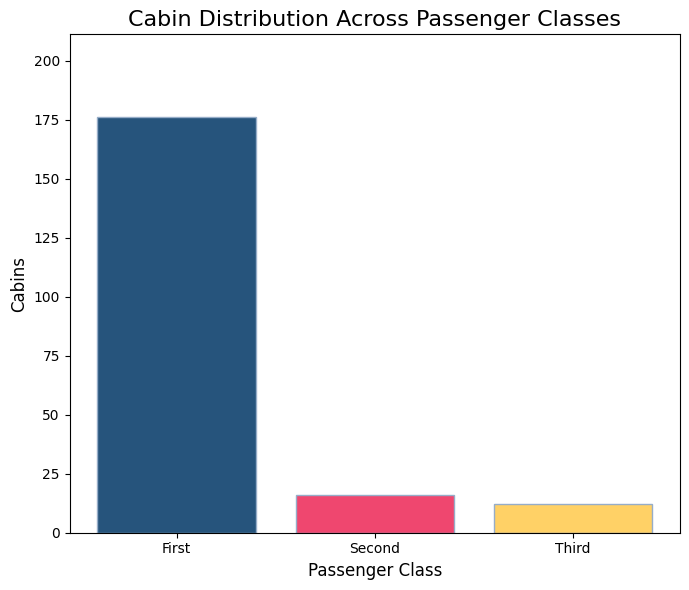

In [36]:
# 1. Define the categorical data and their counts
# Categories for the X-axis:
categories = ['First', 'Second', 'Third']
# Corresponding values for the Y-axis:
counts = [176, 16, 12]

# Create a small Pandas Series for convenience:
pclass_cabin_dist_data = pd.Series(counts, index=categories)

# 2. Create the Bar Plot
# Plot the bars:
fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(
    pclass_cabin_dist_data.index,     # X-axis: Category names
    pclass_cabin_dist_data.values,    # Y-axis: The counts
    color=[dusk_blue, bubblegum_pink, golden_pollen],
    edgecolor=powder_blue
)
# Add title and labels:
plt.title("Cabin Distribution Across Passenger Classes", fontsize=16)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Cabins", fontsize=12)
# Adjust y-limit:
plt.ylim(0, max(counts) * 1.2)

plt.tight_layout()
plt.show()

💡 *Cabin allocations decreased by passenger class.*

- Instead of using `null`, we will use the value `Unassigned` to paint a more clearer picture across all passenger classes with regards to cabin allocations.

In [37]:
titanic_dataset['Cabin'].fillna(
  value="Unassigned",
  inplace=True
)

titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,Unassigned,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,0,0,STON/O2. 3101282,7.9250,Unassigned,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,Unassigned,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,Second,"Montvila, Rev. Juozas",Male,27,0,0,211536,13.0000,Unassigned,S
887,888,Yes,First,"Graham, Miss Margaret Edith",Female,19,0,0,112053,30.0000,B42,S
888,889,No,Third,"Johnston, Miss Catherine Helen ""Carrie""",Female,30,1,2,W./C. 6607,23.4500,Unassigned,S
889,890,Yes,First,"Behr, Mr. Karl Howell",Male,26,0,0,111369,30.0000,C148,C


View the missing values in the `titanic_dataset['Embarked']` column:

In [38]:
titanic_dataset.loc[titanic_dataset['Embarked'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,Yes,First,"Icard, Miss Amelie",Female,38,0,0,113572,80.0,B28,NaN
829,830,Yes,First,"Stone, Mrs. George Nelson (Martha Evelyn)",Female,62,0,0,113572,80.0,B28,NaN


It appears the passengers never embarked on the ship, therefore we drop their respective entries as they won't be relevant to the main target variable i.e. Survival.

In [39]:
titanic_dataset.dropna(subset=['Embarked'], inplace=True)
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    int64   
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        889 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(1), int64(4), object(3)
memory usage: 66.5+ KB


### 3. Univariate Analysis:

- Plot the columns with categorical `dtypes` to visualize the distribution of the different categorical values in each column.

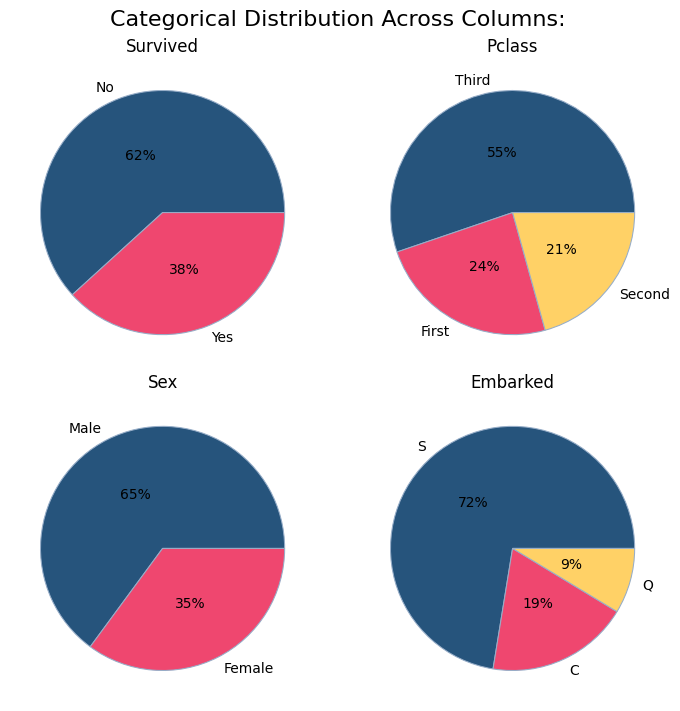

In [40]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=2,
  figsize=(7, 7),
  layout='constrained'
  )

# ['Survived'] column:
axs[0, 0].pie(
  titanic_dataset['Survived'].value_counts(),
  labels=titanic_dataset['Survived'].unique(),
  colors=[dusk_blue, bubblegum_pink],
  wedgeprops={"linewidth": 0.75, "edgecolor": powder_blue},
  autopct='%1.0f%%',
  pctdistance=0.5,
  radius=1
)
axs[0, 0].set_title("Survived")

# ['Pclass'] column:
axs[0, 1].pie(
  titanic_dataset['Pclass'].value_counts(),
  labels=titanic_dataset['Pclass'].unique(),
  colors=[dusk_blue, bubblegum_pink, golden_pollen],
  wedgeprops={"linewidth": 0.75, "edgecolor": powder_blue},
  autopct='%1.0f%%',
  pctdistance=0.5,
  radius=1
)
axs[0, 1].set_title("Pclass")

# ['Sex'] column:
axs[1, 0].pie(
  titanic_dataset['Sex'].value_counts(),
  labels=titanic_dataset['Sex'].unique(),
  colors=[dusk_blue, bubblegum_pink],
  wedgeprops={"linewidth": 0.75, "edgecolor": powder_blue},
  autopct='%1.0f%%',
  pctdistance=0.5,
  radius=1
)
axs[1, 0].set_title("Sex")

# ['Embarked'] column:
axs[1, 1].pie(
  titanic_dataset['Embarked'].value_counts(),
  labels=titanic_dataset['Embarked'].unique(),
  colors=[dusk_blue, bubblegum_pink, golden_pollen],
  wedgeprops={"linewidth": 0.75, "edgecolor": powder_blue},
  autopct='%1.0f%%',
  pctdistance=0.5,
  radius=1
)
axs[1, 1].set_title("Embarked")

fig.suptitle(
  "Categorical Distribution Across Columns:",
  fontsize=16
  )

plt.show()

- Plot the age distribution of the passengers.

- Using age groups is an effective way of doing this. They are divided into the following categories:

| Group Name: | Age Range: |
| :--- | :--- |
| Child | **0-12** |
| Teenager | **13-19** |
| Young Adult | **20-34** |
| Middle-Aged | **35-54** |
| Pre-Retirement | **55-64** |
| Senior | **65+** |

In [41]:
# Create a new dataframe with the age group column:
titanic_dataset_age_groups = titanic_dataset.copy()
titanic_dataset_age_groups['Age Group'] = titanic_dataset['Age']
titanic_dataset_age_groups.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7.2500,Unassigned,S,22
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,1,0,PC 17599,71.2833,C85,C,38
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,0,0,STON/O2. 3101282,7.9250,Unassigned,S,26
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,1,0,113803,53.1000,C123,S,35
4,5,No,Third,"Allen, Mr. William Henry",Male,35,0,0,373450,8.0500,Unassigned,S,35


In [42]:
# Re-arrange the column positions:
column_labels = [
  'PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'Age Group',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'
]

titanic_dataset_age_groups = titanic_dataset_age_groups.reindex(columns=column_labels)
titanic_dataset_age_groups.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,22,1,0,A/5 21171,7.2500,Unassigned,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,38,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,26,0,0,STON/O2. 3101282,7.9250,Unassigned,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,35,1,0,113803,53.1000,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,35,0,0,373450,8.0500,Unassigned,S


- Convert age values in `titanic_dataset_age_groups['Age Group']` to groups of age ranges.

In [43]:
# Define bins and corresponding labels:
bins = [0, 12, 19, 34, 54, 64, 120]
labels = [
  'Child (0-12)',
  'Teen (13-19)',
  'Young Adult (20-34)',
  'Middle-Aged (35-54)',
  'Pre-Retiree (55-64)',
  'Senior (65+)'
]

# Apply to the DataFrame:
titanic_dataset_age_groups['Age Group'] = pd.cut(
  titanic_dataset_age_groups['Age Group'],
  bins=bins,
  labels=labels,
)

titanic_dataset_age_groups['Age Group'].value_counts()

Age Group
Young Adult (20-34)    492
Middle-Aged (35-54)    192
Teen (13-19)            95
Child (0-12)            68
Pre-Retiree (55-64)     30
Senior (65+)            11
Name: count, dtype: int64

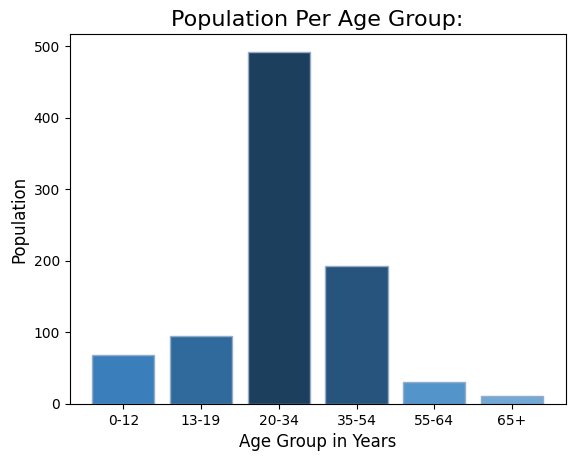

In [44]:
fig, ax = plt.subplots()

age_groups = ['0-12', '13-19', '20-34', '35-54', '55-64', '65+']
age_counts = [68, 95, 492, 192, 30, 11]

colors_age_groups = {
  '20-34': '#1D3F5E',
  '35-54': '#26547C',
  '13-19': '#306A9C',
  '0-12': '#3A7FBB',
  '55-64': '#5395CA',
  '65+': '#72A8D5'
}

ax.bar(
  age_groups,
  age_counts,
  color=[
    colors_age_groups['0-12'],
    colors_age_groups['13-19'],
    colors_age_groups['20-34'],
    colors_age_groups['35-54'],
    colors_age_groups['55-64'],
    colors_age_groups['65+']
	],
  edgecolor=powder_blue,
)

plt.title("Population Per Age Group:", fontsize=16)
plt.xlabel("Age Group in Years", fontsize=12)
plt.ylabel("Population", fontsize=12)

plt.show()

- Visualize the distribution of passengers that were assigned cabins and those that weren't assigned cabins.

In [100]:
cabin_assignment = titanic_dataset.copy()
cabin_assignment['Cabin'].replace(
  {'Unassigned': np.nan},
  inplace=True
)

print(
  f"Assigned: {cabin_assignment.loc[cabin_assignment['Cabin'].isna() == False].shape[0]}",
  f"\nUnassigned: {cabin_assignment.loc[cabin_assignment['Cabin'].isna() == True].shape[0]}"
  )

Assigned: 202 
Unassigned: 687


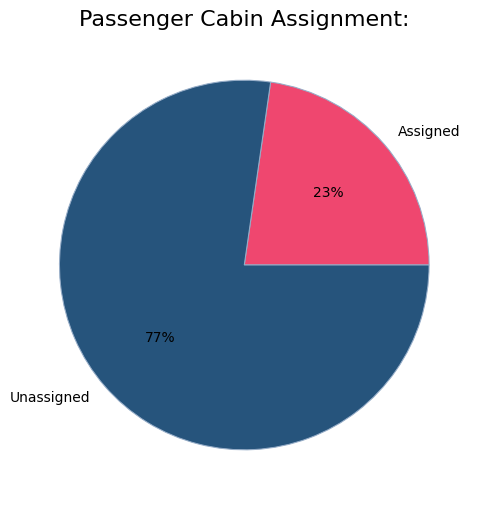

In [110]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(
  [202, 687],
  labels=['Assigned', 'Unassigned'],
  colors=[bubblegum_pink, dusk_blue],
  wedgeprops={'linewidth': 0.75, 'edgecolor': powder_blue},
  autopct='%1.0f%%'
)
ax.set_title('Passenger Cabin Assignment:', fontsize='16')

plt.show()

### 3. Bivariate Analysis:

- Survivors and casualties across `['Pclass']`, `['Sex']`, `['Cabin']` and `['Embarked']`.

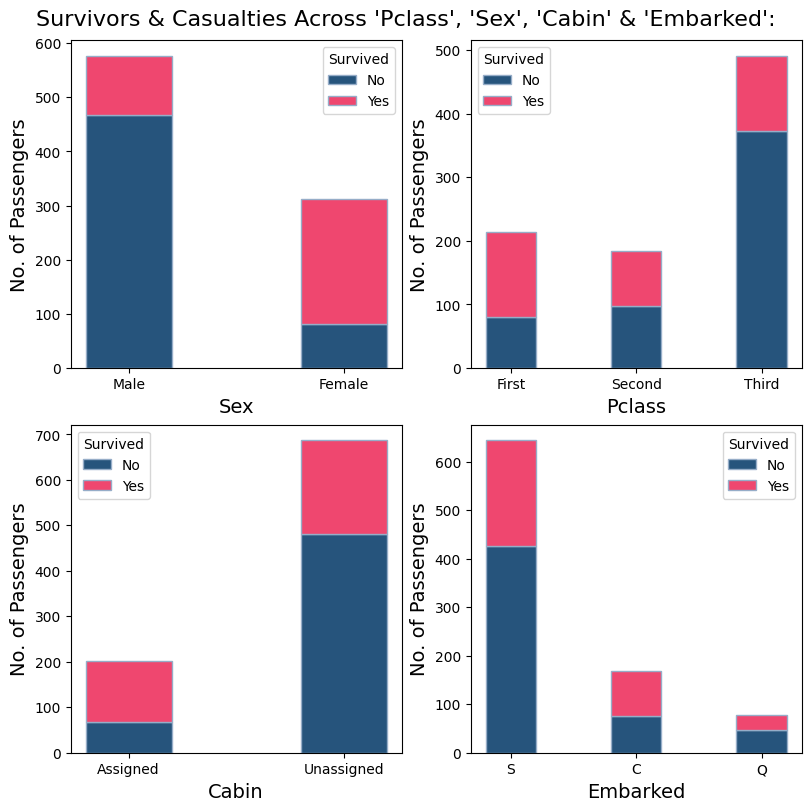

In [230]:
fig, axs = plt.subplots(
  nrows=2,
  ncols=2,
  layout='constrained',
  figsize=(8, 8)
)
fig.suptitle("Survivors & Casualties Across 'Pclass', 'Sex', 'Cabin' & 'Embarked':", fontsize=16)

axs[0, 0].set_xlabel("Sex", fontsize=14)
axs[0, 0].set_ylabel("No. of Passengers", fontsize=14)
axs[0, 0].bar(
  ['Male', 'Female'], [468, 81],
  color=dusk_blue,
  width=0.4,
  edgecolor=powder_blue
)
axs[0, 0].bar(
  ['Male', 'Female'], [109, 231],
  bottom=[468, 81],
  color=bubblegum_pink,
  width=0.4,
  edgecolor=powder_blue
)
axs[0, 0].legend(['No', 'Yes'], title='Survived')

axs[1, 0].set_xlabel("Cabin", fontsize=14)
axs[1, 0].set_ylabel("No. of Passengers", fontsize=14)
axs[1, 0].bar(
  ['Assigned', 'Unassigned'], [68, 481],
  color=dusk_blue,
  width=0.4,
  edgecolor=powder_blue
)
axs[1, 0].bar(
  ['Assigned', 'Unassigned'], [134, 206],
  bottom=[68, 481],
  color=bubblegum_pink,
  width=0.4,
  edgecolor=powder_blue
)
axs[1, 0].legend(['No', 'Yes'], title='Survived')

axs[0, 1].set_xlabel("Pclass", fontsize=14)
axs[0, 1].set_ylabel("No. of Passengers", fontsize=14)
axs[0, 1].bar(
  ['First', 'Second', 'Third'], [80, 97, 372],
  color=dusk_blue,
  width=0.4,
  edgecolor=powder_blue
)
axs[0, 1].bar(
  ['First', 'Second', 'Third'], [134, 87, 119],
  bottom=[80, 97, 372],
  color=bubblegum_pink,
  width=0.4,
  edgecolor=powder_blue
)
axs[0, 1].legend(['No', 'Yes'], title='Survived')

axs[1, 1].set_xlabel("Embarked", fontsize=14)
axs[1, 1].set_ylabel("No. of Passengers", fontsize=14)
axs[1, 1].bar(
  ['S', 'C', 'Q'], [427, 75, 47],
  color=dusk_blue,
  width=0.4,
  edgecolor=powder_blue
)
axs[1, 1].bar(
  ['S', 'C', 'Q'], [217, 93, 30],
  bottom=[427, 75, 47],
  color=bubblegum_pink,
  width=0.4,
  edgecolor=powder_blue
)
axs[1, 1].legend(['No', 'Yes'], title='Survived')

plt.show()

- Survivors and casualties per age-group.

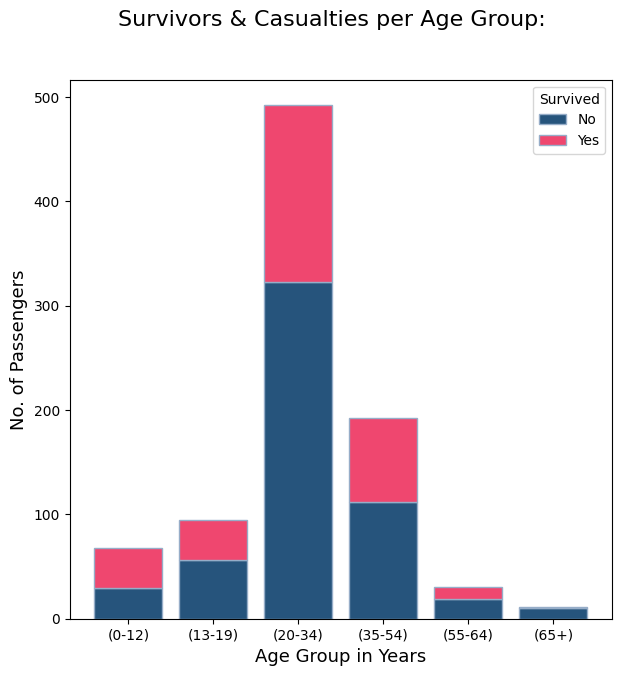

In [229]:
fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle("Survivors & Casualties per Age Group:", fontsize=16)

ax.bar(
  ['(0-12)', '(13-19)', '(20-34)', '(35-54)', '(55-64)', '(65+)'], [29, 56, 323, 112, 19, 10],
  color=dusk_blue,
  edgecolor=powder_blue
)
ax.bar(
  ['(0-12)', '(13-19)', '(20-34)', '(35-54)', '(55-64)', '(65+)'], [39, 39, 169, 80, 11, 1],
  bottom=[29, 56, 323, 112, 19, 10],
  color=bubblegum_pink,
  edgecolor=powder_blue
)
ax.set_xlabel("Age Group in Years", fontsize=13)
ax.set_ylabel("No. of Passengers", fontsize=13)
ax.legend(['No', 'Yes'], title='Survived')

plt.show()